## Función Qing

La función Qing es una función continua, diferenciable, separable, escalable y multimodal. Está definida como:

$$ f(x) = \sum_{i=1}^{D} (x_i^{2} - i)^{2} $$

Donde:

$$ x_i \in [-500, 500] $$


La solución global conocida es:

$$ x^* = \pm \sqrt{i} $$ 
con $$ f(x^*) = 0 $$

Dado que la función anterior, es una función multimodal con múltiples mínimos locales, los algoritmos de optimización tradicionales como el descenso por gradiente pueden quedarse atrapados en mínimos locales. A continuación, se presentan algunos algoritmos de optimización más adecuados para resolver dicha función.

### 1. **Algoritmos Evolutivos (EA - Evolutionary Algorithms)**

Los algoritmos evolutivos son una buena opción para problemas multimodales como la Qing Function, ya que exploran el espacio de búsqueda utilizando poblaciones de soluciones. Ejemplo: Algoritmos Genéticos (GA)

**Ventajas**:
- Puede encontrar múltiples mínimos locales y escapar de ellos.
- No necesita información del gradiente.

**Desventajas**:
- En ocasiones puede ser computacionalmente costoso.

In [69]:
import time
import random
from deap import base, creator, tools, algorithms

# Definir la Qing Function
def qing_function(individual):
    result = sum((x**2 - i)**2 for i, x in enumerate(individual, start=1))
    return result,

# Definir la funcion 
def genetic_algorithm(dimension):

    random.seed(42)

    # Verificar si la clase "FitnessMin" ya ha sido creada
    if not hasattr(creator, "FitnessMin"):
        # Definir el tipo de fitness (minimización)
        creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    
    # Verificar si la clase "Individual" ya ha sido creada
    if not hasattr(creator, "Individual"):
        # Definir el tipo de individuo (una lista que maximiza el fitness)
        creator.create("Individual", list, fitness=creator.FitnessMin)

    # Crear la caja de herramientas para el algoritmo genético
    toolbox = base.Toolbox()

    # Definir los atributos del individuo (valores en el rango [-500, 500])
    toolbox.register("attr_float", random.uniform, -500, 500)
    # Definir un individuo que es una lista de floats
    toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=dimension)  # n = D (dimensionalidad)
    # Definir una población (lista de individuos)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)

    # Definir la función objetivo
    toolbox.register("evaluate", qing_function)
    # Definir los operadores genéticos (selección, cruce y mutación)
    toolbox.register("mate", tools.cxBlend, alpha=0.5)  # Cruce (blend crossover)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=100, indpb=0.1)  # Mutación gaussiana
    toolbox.register("select", tools.selTournament, tournsize=3)  # Selección por torneo

    # Inicializar la población
    population = toolbox.population(n=100)  # Tamaño de la población
    
    # Definir los parámetros del algoritmo genético
    # cxpb es la probabilidad de cruce, mutpb es la probabilidad de mutación
    cxpb, mutpb, ngen = 0.5, 0.2, 40  # 40 generaciones

    # Ejecutar el algoritmo genético utilizando las herramientas de DEAP
    algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen, verbose=False)
    
    # Obtener el mejor individuo
    best_individual = tools.selBest(population, k=1)[0]
    return best_individual.fitness.values[0]

# Función principal que ejecuta el algoritmo genético
def main_ga():
    start_time = time.time()
    ga_errors = []
    ga_times = []

    for i in range(20):
        result = genetic_algorithm(dimension=i+1)
        ga_errors.append(result)
        time_ = time.time()
        ga_times.append(time_ - start_time)
        print(f"Dimension = {i+1} || Error = {result} || Tiempo = {time_ - start_time}")
        start_time = time_

    return ga_errors, ga_times

ga_errors, ga_times = main_ga()



Dimension = 1 || Error = 0.0 || Tiempo = 0.15056514739990234
Dimension = 2 || Error = 1.7993055644793467e-10 || Tiempo = 0.11668777465820312
Dimension = 3 || Error = 4.573326559161897e-08 || Tiempo = 0.10073018074035645
Dimension = 4 || Error = 0.039803511733327614 || Tiempo = 0.13065123558044434
Dimension = 5 || Error = 0.084244180843396 || Tiempo = 0.11967968940734863
Dimension = 6 || Error = 3.9855288707211907 || Tiempo = 0.1346421241760254
Dimension = 7 || Error = 21.09242204282663 || Tiempo = 0.1276566982269287
Dimension = 8 || Error = 102.83731695674308 || Tiempo = 0.12767624855041504
Dimension = 9 || Error = 226.15629244089794 || Tiempo = 0.19246888160705566
Dimension = 10 || Error = 4187.0410089133275 || Tiempo = 0.26927924156188965
Dimension = 11 || Error = 260373.8201003656 || Tiempo = 0.26927900314331055
Dimension = 12 || Error = 236311.82989957076 || Tiempo = 0.21442651748657227
Dimension = 13 || Error = 231675.47852239775 || Tiempo = 0.14362311363220215
Dimension = 14 || E

### **2. Optimización por Enjambre de Partículas (PSO - Particle Swarm Optimization)**
PSO es otro algoritmo de optimización inspirado en la naturaleza que funciona bien en funciones multimodales. Aquí, cada partícula representa una solución, y las partículas se mueven en el espacio de búsqueda basándose en su mejor posición conocida y la de sus vecinas.

**Ventajas**:
- PSO tiende a ser rápido y converge hacia soluciones aceptables.
- Buena para problemas con múltiples mínimos locales.

**Desventajas**:
- Puede quedarse atrapado en mínimos locales en casos de alta complejidad.

In [70]:
from pyswarm import pso
import numpy as np

# Definir la función objetivo (Qing Function)
def qing_function_pso(x):
    return np.sum((x**2 - np.arange(1, len(x)+1))**2)

def pso_(dimension):
    best_position, best_value = pso(qing_function_pso, [-500]*dimension, [500]*dimension)
    return best_value
    
# Función principal que ejecuta el algoritmo de optimización por enjambre de partículas
def main_pso():
    start_time = time.time()
    pso_errors = []
    pso_times = []

    for i in range(20):
        result = pso_(dimension=i+1)
        pso_errors.append(result)
        time_ = time.time()
        pso_times.append(time_ - start_time)
        print(f"Dimension = {i+1} || Error = {result} || Tiempo = {time_ - start_time}")
        start_time = time_

    return pso_errors, pso_times

pso_errors, pso_times = main_pso()



Stopping search: Swarm best objective change less than 1e-08
Dimension = 1 || Error = 4.224716667007782e-10 || Tiempo = 0.2543187141418457
Stopping search: Swarm best objective change less than 1e-08
Dimension = 2 || Error = 9.424068424436933e-09 || Tiempo = 0.1775503158569336
Stopping search: Swarm best objective change less than 1e-08
Dimension = 3 || Error = 2.1677910974809488e-09 || Tiempo = 0.21340703964233398
Stopping search: Swarm best objective change less than 1e-08
Dimension = 4 || Error = 1.6799797426203053e-08 || Tiempo = 0.20644474029541016
Stopping search: Swarm best objective change less than 1e-08
Dimension = 5 || Error = 2.2358514905449668e-07 || Tiempo = 0.20545101165771484
Stopping search: Swarm best objective change less than 1e-08
Dimension = 6 || Error = 1.4528029375643178e-08 || Tiempo = 0.25034594535827637
Stopping search: Swarm best objective change less than 1e-08
Dimension = 7 || Error = 4.097835985665142e-08 || Tiempo = 0.24635601043701172
Stopping search: m

### **3. Algoritmo de Recocido Simulado (Simulated Annealing - SA)**
El recocido simulado es un algoritmo probabilístico que busca minimizar una función objetivo explorando el espacio de búsqueda de manera similar a un proceso de enfriamiento en física.

**Ventajas**:
- Es simple de implementar y puede escapar de mínimos locales en las primeras etapas del proceso.

**Desventajas**:
- La convergencia puede ser lenta, y el rendimiento depende de cómo configures el esquema de enfriamiento.

In [71]:
import numpy as np
from scipy.optimize import dual_annealing

# Definir la funcion objetivo (Qing Function)
def qing_function_sa(x):
    return np.sum((x**2 - np.arange(1, len(x)+1))**2)

def sa(dimension): 

    # Ejecutar el algoritmo de Recocido Simulado
    result = dual_annealing(qing_function_sa, [(-500, 500)]*dimension)

    return result.fun

# Función principal que ejecuta el algoritmo de recocido simulado
def main_sa():
    start_time = time.time()
    sa_errors = []
    sa_times = []

    for i in range(20):
        result = sa(dimension=i+1)
        sa_errors.append(result)
        time_ = time.time()
        sa_times.append(time_ - start_time)
        print(f"Dimension = {i+1} || Error = {result} || Tiempo = {time_ - start_time}")
        start_time = time_

    return sa_errors, sa_times

sa_errors, sa_times = main_sa()

Dimension = 1 || Error = 3.326204023783708e-14 || Tiempo = 0.30219078063964844
Dimension = 2 || Error = 1.1935935520574038e-12 || Tiempo = 0.3071866035461426
Dimension = 3 || Error = 1.2987034905144579e-12 || Tiempo = 0.4128878116607666
Dimension = 4 || Error = 4.3612533484477565e-12 || Tiempo = 0.4996652603149414
Dimension = 5 || Error = 3.282957738792805e-11 || Tiempo = 0.6293463706970215
Dimension = 6 || Error = 2.8053282889727736e-12 || Tiempo = 0.7768919467926025
Dimension = 7 || Error = 8.030401892180256e-13 || Tiempo = 0.8926129341125488
Dimension = 8 || Error = 8.383516098112041e-11 || Tiempo = 0.9784138202667236
Dimension = 9 || Error = 4.609940611315116e-13 || Tiempo = 1.088064193725586
Dimension = 10 || Error = 1.9381414128703908e-12 || Tiempo = 1.2765817642211914
Dimension = 11 || Error = 7.921391167581002e-10 || Tiempo = 1.3952703475952148
Dimension = 12 || Error = 8.324083938518423e-11 || Tiempo = 1.4610941410064697
Dimension = 13 || Error = 3.1885418889997403e-11 || Tiem

### **4. Optimización Diferencial (DE - Differential Evolution)**
La optimización diferencial es una técnica basada en la población que muta soluciones de manera diferencial y es adecuada para optimización global en espacios de búsqueda continuos.

**Ventajas**:
- Es robusta y efectiva en funciones multimodales.
- No requiere derivadas de la función objetivo.

**Desventajas**:
- Puede requerir un gran número de evaluaciones de la función.

In [72]:
import numpy as np
from scipy.optimize import differential_evolution

# Definir la funcion objetivo (Qing Function)
def qing_function_DE(x):
    return np.sum((x**2 - np.arange(1, len(x)+1))**2)

def DE(dimension):
    # Ejecutar el algoritmo de optimización diferencial
    result = differential_evolution(qing_function_DE, [(-500, 500)]*dimension)
    return result.fun

# Función principal que ejecuta el algoritmo de optimización diferencial
def main_DE():
    start_time = time.time()
    DE_errors = []
    DE_times = []

    for i in range(20):
        result = DE(dimension=i+1)
        DE_errors.append(result)
        time_ = time.time()
        DE_times.append(time_ - start_time)
        print(f"Dimension = {i+1} || Error = {result} || Tiempo = {time_ - start_time}")
        start_time = time_

    return DE_errors, DE_times

DE_errors, DE_times = main_DE()

Dimension = 1 || Error = 3.1554436208840472e-30 || Tiempo = 0.1575765609741211
Dimension = 2 || Error = 2.0510383535746307e-28 || Tiempo = 0.42586326599121094
Dimension = 3 || Error = 1.0383381664971568e-27 || Tiempo = 0.799893856048584
Dimension = 4 || Error = 2.133494039692857e-26 || Tiempo = 1.4500880241394043
Dimension = 5 || Error = 1.0634042217605544e-26 || Tiempo = 1.979706048965454
Dimension = 6 || Error = 3.785053230863567e-26 || Tiempo = 2.4405014514923096
Dimension = 7 || Error = 3.068530870651322e-26 || Tiempo = 3.2134077548980713
Dimension = 8 || Error = 6.966134831167297e-26 || Tiempo = 4.093027114868164
Dimension = 9 || Error = 5.441818904008736e-26 || Tiempo = 5.232008218765259
Dimension = 10 || Error = 6.423082984013153e-26 || Tiempo = 7.345387697219849
Dimension = 11 || Error = 1.4535097444581861e-25 || Tiempo = 8.193060159683228
Dimension = 12 || Error = 1.2961162166484899e-25 || Tiempo = 9.825756788253784
Dimension = 13 || Error = 1.3957335717597992e-25 || Tiempo = 

### **5. Búsqueda Local Multimodal (Multimodal Local Search - MLS)**
Un enfoque más directo es utilizar algoritmos de búsqueda local combinados con técnicas de reinicio, como la búsqueda tabú o la búsqueda de vecindad variable.

**Ventajas**:
- Muy eficiente en términos de tiempo de cómputo.
- Fácil de implementar.

**Desventajas**:
- Necesita combinarse con técnicas de reinicio para evitar quedar atrapado en mínimos locales.

In [73]:
import numpy as np
from scipy.optimize import minimize

# Definir la función objetivo (Qing Function)
def qing_function_mls(x):
    return np.sum((x**2 - np.arange(1, len(x)+1))**2)

# Definir la función para búsqueda local con reinicio
def multimodal_local_search(bounds, restarts=5):
    best_solution = None
    best_value = float('inf')
    
    for _ in range(restarts):
        # Iniciar desde una solución aleatoria
        x0 = np.random.uniform(bounds[:, 0], bounds[:, 1])
        
        # Búsqueda local utilizando el método L-BFGS-B
        result = minimize(qing_function_mls, x0, method='L-BFGS-B', bounds=bounds)
        
        # Almacenar la mejor solución encontrada
        if result.fun < best_value:
            best_value = result.fun
            best_solution = result.x
            
    return best_solution, best_value

def mls(dimension):
    # Definir los límites para las variables
    bounds = np.array([(-500, 500) for i in range(dimension)]) 

    # Ejecutar la MLS con 5 reinicios
    best_solution, best_value = multimodal_local_search(bounds, restarts=5)
    
    return best_value

# Función principal que ejecuta el algoritmo de búsqueda local multimodal
def main_mls():
    start_time = time.time()
    mls_errors = []
    mls_times = []

    for i in range(20):
        result = mls(dimension=i+1)
        mls_errors.append(result)
        time_ = time.time()
        mls_times.append(time_ - start_time)
        print(f"Dimension = {i+1} || Error = {result} || Tiempo = {time_ - start_time}")
        start_time = time_

    return mls_errors, mls_times

mls_errors, mls_times = main_mls()

Dimension = 1 || Error = 1.886751676670567e-18 || Tiempo = 0.04786968231201172
Dimension = 2 || Error = 3.8139853976433245e-16 || Tiempo = 0.04188966751098633
Dimension = 3 || Error = 6.854391789571585e-16 || Tiempo = 0.05385875701904297
Dimension = 4 || Error = 4.339477217934306e-14 || Tiempo = 0.06682038307189941
Dimension = 5 || Error = 1.4016015271748302e-12 || Tiempo = 0.09175229072570801
Dimension = 6 || Error = 4.680903696726085e-13 || Tiempo = 0.08676862716674805
Dimension = 7 || Error = 1.0705427357626753e-13 || Tiempo = 0.06981325149536133
Dimension = 8 || Error = 9.59133334351464e-13 || Tiempo = 0.08178257942199707
Dimension = 9 || Error = 2.6172583728341907e-12 || Tiempo = 0.09574294090270996
Dimension = 10 || Error = 1.847714800956951e-11 || Tiempo = 0.10272479057312012
Dimension = 11 || Error = 1.7083157749381042e-11 || Tiempo = 0.13463902473449707
Dimension = 12 || Error = 3.905129365294168e-12 || Tiempo = 0.264296293258667
Dimension = 13 || Error = 1.7247242598414026e-1

### Análisis del error de los algoritmo de acuerdo a la variación de las dimensiones

A continuación se mostrará un gráfico de la valoración de la calidad del punto hallado en cuanto a cercanía a la solución conocida por cada algoritmo utilizado, en diferentes dimensiones.

### Gráfica 1:

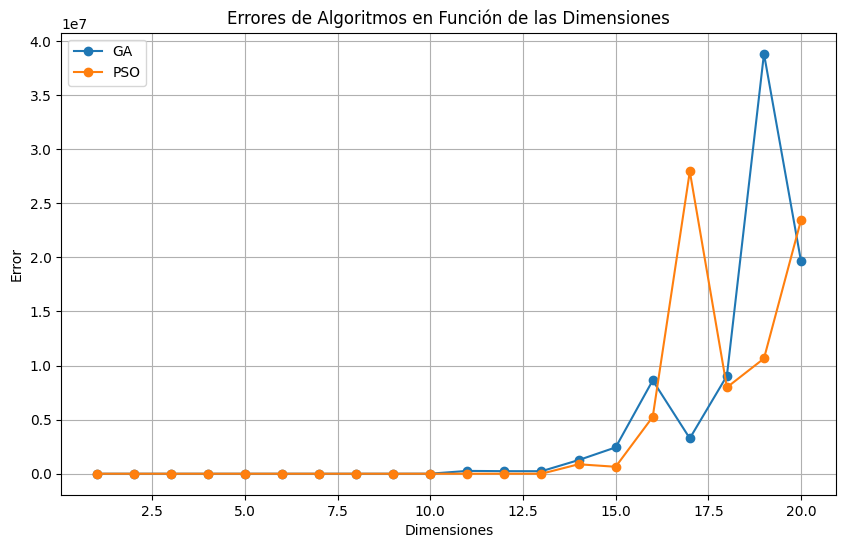

In [74]:
import matplotlib.pyplot as plt
import numpy as np

dimensions = np.arange(1, 21)  # Dimensiones de 1 a 20

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada conjunto de errores
plt.plot(dimensions, ga_errors, marker='o', label='GA')
plt.plot(dimensions, pso_errors, marker='o', label='PSO')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Errores de Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


En la gráfica anterior se puede evidenciar como aumenta el error a partir de las dimensiones de tamaño 15. En estos dos algoritmos (*Algoritmo Genético* y *Optimización por Enjambre de Partículas*) el error aumenta mucho a medida que aumentan las dimensiones, por lo que para valores grandes de dimensiones, estos algoritmos no son muy adecuados.

### Gráfica 2

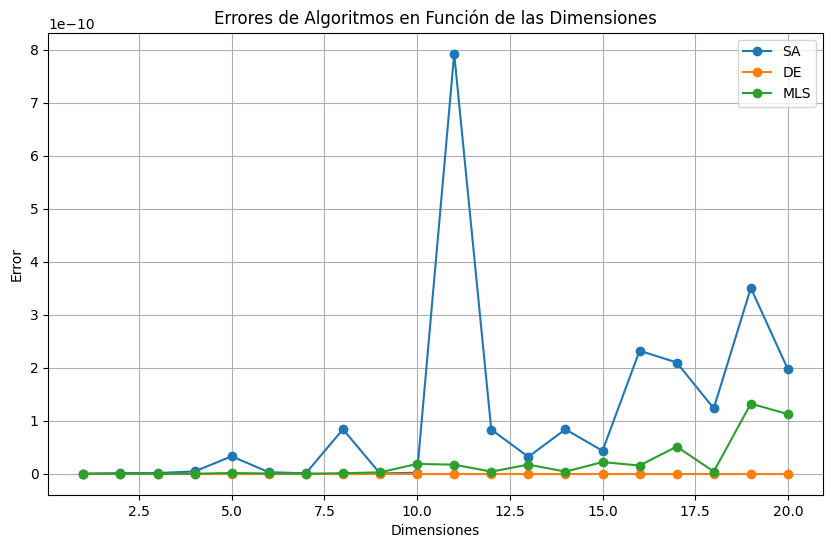

In [75]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada conjunto de errores
plt.plot(dimensions, sa_errors, marker='o', label='SA')
plt.plot(dimensions, DE_errors, marker='o', label='DE')
plt.plot(dimensions, mls_errors, marker='o', label='MLS')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Errores de Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

En estos algoritmos (*Recocido Simulado*, *Optimización Diferencial*, *Búsqueda Local Multimodal*) el error es bastante bajo, pero se evidencia un mayor error en el algoritmo de *Recocido Simulado*, por lo que este es menos adecuado que los otros para la funcion Qing.

### Gráfica 3

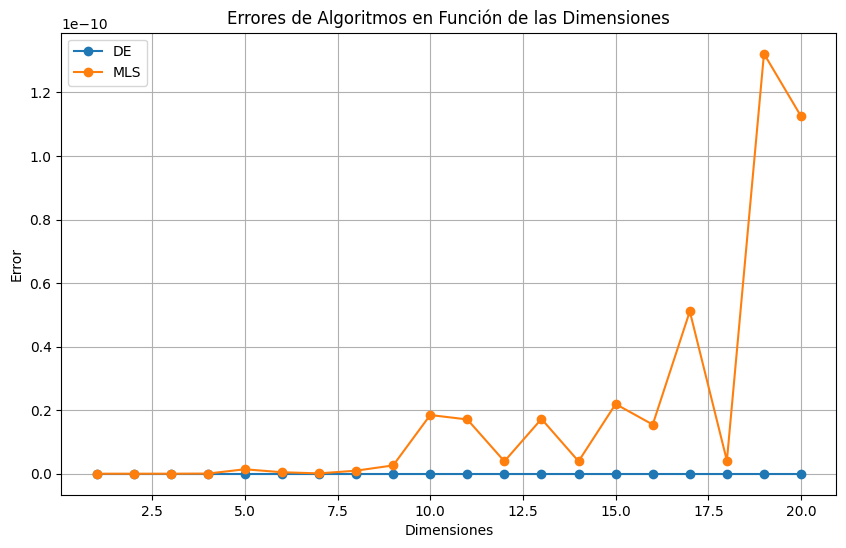

In [76]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada conjunto de errores
plt.plot(dimensions, DE_errors, marker='o', label='DE')
plt.plot(dimensions, mls_errors, marker='o', label='MLS')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Error')
plt.title('Errores de Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

En estos algoritmos (*Optimización Diferencial*, *Búsqueda Local Multimodal*) se puede evidenciar como siguen siendo bastante correctos estos algoritmos en cuanto a la solución, pero es muy claro el poder del algoritmo *Optimización Diferencial* que a pesar del crecimiento de las dimensiones sigue dando valores con un error muy bajo. 

### Análisis del tiempo computacional del algoritmo de acuerdo a la variación de las dimensiones

### Gráfica 1

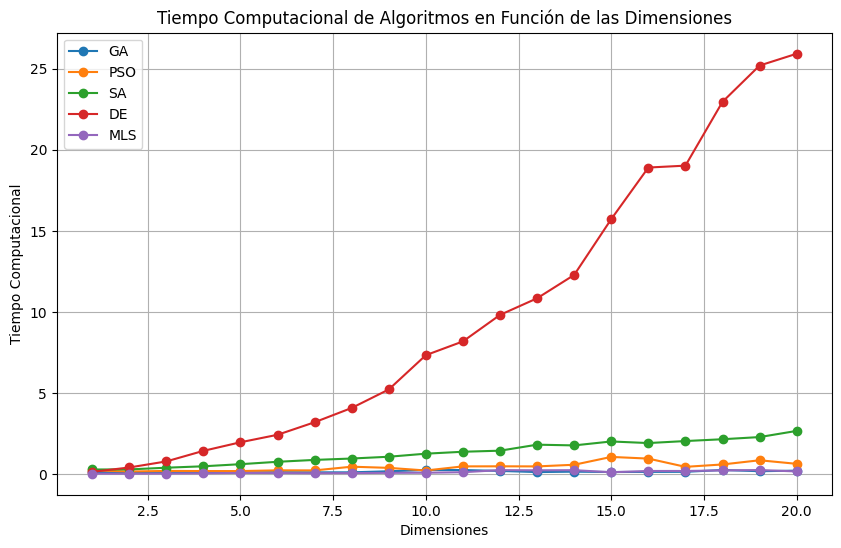

In [77]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada conjunto de errores
plt.plot(dimensions, ga_times, marker='o', label='GA')
plt.plot(dimensions, pso_times, marker='o', label='PSO')
plt.plot(dimensions, sa_times, marker='o', label='SA')
plt.plot(dimensions, DE_times, marker='o', label='DE')
plt.plot(dimensions, mls_times, marker='o', label='MLS')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Tiempo Computacional')
plt.title('Tiempo Computacional de Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

En esta gráfica se puede presenciar como el algoritmo de *Optimización Diferencial* es tan ineficiente en relación a los otros algoritmos. En el caso del algoritmo de *Recocido Simulado*, se puede comprobar que no es un algoritmo ineficiente, pero los restantes algoritmos son un poco más eficientes que él.

### Gráfica 2

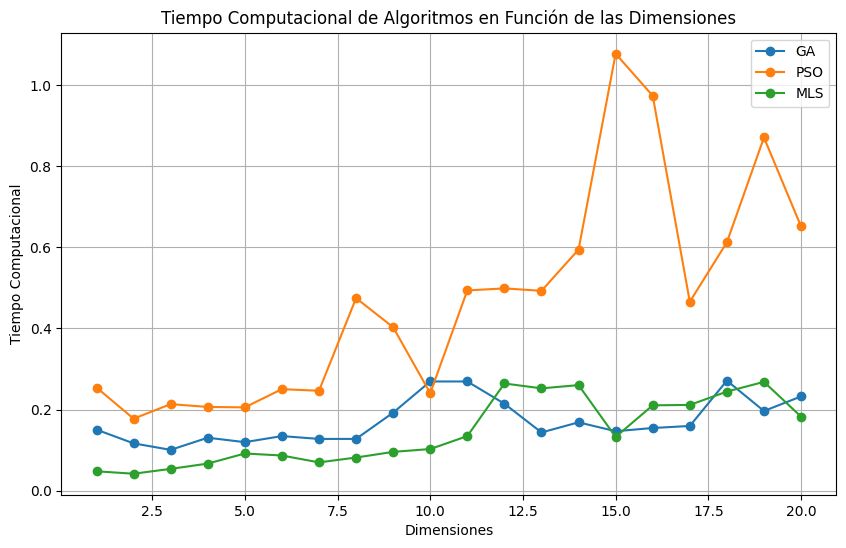

In [78]:
# Crear el gráfico
plt.figure(figsize=(10, 6))

# Graficar cada conjunto de tiempo computacional
plt.plot(dimensions, ga_times, marker='o', label='GA')
plt.plot(dimensions, pso_times, marker='o', label='PSO')
plt.plot(dimensions, mls_times, marker='o', label='MLS')

# Configurar los ejes y la leyenda
plt.xlabel('Dimensiones')
plt.ylabel('Tiempo Computacional')
plt.title('Tiempo Computacional de Algoritmos en Función de las Dimensiones')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

En esta gráfica se evidencia que los algoritmos *Búsqueda Local Multimodal*, *Algoritmo Genético* y *Optimización por Enjambre de Partículas* son algoritmos muy eficientes, incluso para dimensiones grandes, pero en el caso de *Búsqueda Local Multimodal* y *Algoritmo Genético* son un poco más eficientes que *Optimización por Enjambre de Partículas*.

### Conclusión

Para la función Qing el algoritmo de *Optimización Diferencial* es muy bueno para dar una solución más cercana a la solución conocida, pero resulta muy ineficiente en tiempo de cómputo. Por otro lado, el *Algoritmo Genético* es muy eficiente, pero el error que da con respecto a la solución conocida es muy grande cuando aumentan las dimensiones. Por tanto, siguiendo los resultados experimentados en las gráficas anteriores, el algoritmo más balanceado en cuanto a disminución del error y tiempo computacional es el algoritmo de *Búsqueda Local Multimodal*, adaptándose mejor a cualquier tipo de situación que se presente.